W: [0.90230696 0.64821811]
a: -1.391980476255765
support_vectors_: [[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
clf.coef_: [[0.90230696 0.64821811]]


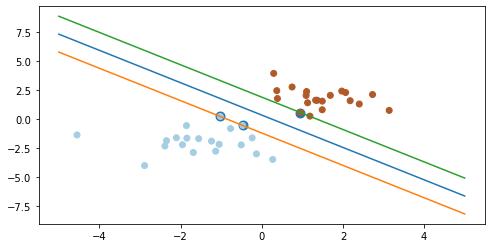

In [3]:
from sklearn import svm 
import numpy as np 
import matplotlib.pyplot as plt 
  
np.random.seed(0) 
x = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]] #正态分布来产生数字,20行2列*2 
y = [0]*20+[1]*20 #20个class0，20个class1 
  
clf = svm.SVC(kernel='linear') 
clf.fit(x,y) 
  
w = clf.coef_[0] #获取w 
a = -w[0]/w[1] #斜率 
#画图划线 
xx = np.linspace(-5,5) #(-5,5)之间x的值 
yy = a*xx-(clf.intercept_[0])/w[1] #xx带入y，截距 
  
#画出与点相切的线 
b = clf.support_vectors_[0] 
yy_down = a*xx+(b[1]-a*b[0]) 
b = clf.support_vectors_[-1] 
yy_up = a*xx+(b[1]-a*b[0]) 
  
print("W:",w) 
print("a:",a) 
  
print("support_vectors_:",clf.support_vectors_) 
print("clf.coef_:",clf.coef_) 
  
plt.figure(figsize=(8,4)) 
plt.plot(xx,yy) 
plt.plot(xx,yy_down) 
plt.plot(xx,yy_up) 
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80) 
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired) #[:，0]列切片，第0列 
  
plt.axis('tight') 
  
plt.show()

In [2]:
def seqPegasos(dataSet, labels, lam, T):
    m, n = shape(dataSet);
    w = zeros(n)
    for t in range(1, T + 1):
        i = random.randint(m)
        eta = 1.0 / (lam * t)
        p = predict(w, dataSet[i, :])
        if labels[i] * p < 1:
            w = (1.0 - 1 / t) * w + eta * labels[i] * dataSet[i, :]
        else:
            w = (1.0 - 1 / t) * w
        #print w
    return w


def predict(w, x):
    return w * x.T


def batchPegasos(dataSet, labels, lam, T, k):
    m, n = shape(dataSet);
    w = zeros(n);
    dataIndex = range(m)
    for t in range(1, T + 1):
        wDelta = mat(zeros(n))  # reset wDelta
        eta = 1.0 / (lam * t)
        random.shuffle(dataIndex)
        for j in range(k):  # go over training set
            i = dataIndex[j]
            p = predict(w, dataSet[i, :])  # mapper code
            if labels[i] * p < 1:  # mapper code
                wDelta += labels[i] * dataSet[i, :].A  # accumulate changes
        w = (1.0 - 1 / t) * w + (eta / k) * wDelta  # apply changes at each T
    return w